# Robot World 1-D

### Skills Learned in this Exercise
* working with python lists
* using discrete probability distributions to represent location
* returning values in a list

### Introduction
In the nanodegree, you will see robot probability distributions represented two different ways: 
* with discrete probability distributions
* and with continuous probability distributions

As a preview of what's to come, you will generally use discrete probability distributions when modeling a car or robot's movement on a grid.

You'll see continuous probability distributions when locating objects that are moving around the self-driving car. And sensor measurement uncertainty is generally represented by continuous probability distributions as well.

For this exercise, you are going to work with discrete probability distributions. 

You are going to pretend your robot lives in a one-dimensional world. You will get some intuition into representing discrete probabilities on a 1D grid map. Then in the next exercise, you will figure out how to represent a discrete probability distribution on a 2D map grid.


## Robot Initialization
Imagine you have a robot living in a 1-D world. The robot lives on a grid with nine different spaces. The robot can only move forwards or backwards. If the robot falls off the grid, it will loop back around to the other side.

The robot has a map so that it knows there are only nine spaces. But the robot does not know where it is on the map. Here is the 1-D map. Even though the world is represented by squares, the world is 1-D because the robot can only move forwards to the next square or backwards to the square behind it:

![1-D Robot World](1D_world.jpg "1-D Robot World")

When the robot first turns on, the probability that the robot is on any one of these spaces is 1/9; the implication is that the robot has an equal probability of being at any of the spaces on the grid.


### Exercise 1 - Initial Probability

Now, write a function that receives the number of spaces in the robot's world and then returns the initial probability that the robot is in each space. This is what the robot would do when it first turns on.

The function should store the probabilities in a list.

So in the example given so far, there would be a list with nine probabilities. And every value in the list would be 1/9. Remember, because the robot does not know where it is at first, the probability of being in any space is the same.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def initialize_robot(grid_size):
    
    grid = []
    
    # TODO: for each space on the map grid, store the initial probability
    # in the grid list. For example, if there are eight spaces on the grid,
    # the grid list should have eight entries where each entry represents
    # the initial probability of the robot being in that space.
    for i in range(0,grid_size-1):
        grid.append(1/grid_size);
    
    return grid

Run the cell below to make sure that your function prints out the right results.

In [4]:
# Result should be a list with 9 elements all having value 1/9
print(initialize_robot(9))

# Result should be a list with 4 elements all having value 1/4
print(initialize_robot(4))

# Result should be a list with 14 elements all having value 1/14
print(initialize_robot(14))

[0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111]
[0.25, 0.25, 0.25]
[0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142]


### Exercise 2 - Grid Probability

Now, write a function called `grid_probability` that outputs the probability that the robot is at a specific point on the grid. The input to this function will be:

* the output of the previous function (ie a list representing a 1-D map of probabilities)
* the grid number where you want to know the probability

So if you wanted to know the current probability that the robot is at the fifth tile on the grid, you would called the function like:

`grid_probability(my_grid, 4)`.

The reason you would call `grid_probability(my_grid, 4)` is because of how lists work in python. The first element in a list is accessed with [0] rather than [1]. 


In [5]:
def grid_probability(grid, position):
    
    ##### 
    # TODO: Use an if statement to make sure that the position input
    # does not go beyond the size of the list. Say the list has five elements
    # and your code tries to access grid[5] or grid[6]. That will lead to an 
    # error.If the position input is legitimate, then return the probability
    # stored at that position. If the position input is not legitimate, then
    # return None
    #####
    if position <= len(grid)-1:
        return grid[position];
    else:
        return None;
        
    return 


Run the cell below to test the results of your code

In [6]:
print(grid_probability([.1, .1, .2, .1, .5], 2))
# will return 0.2
    
print(grid_probability([.1, .1, .2, .1, .5], 7))
# will return None

0.2
None


### Exercise 3 - Visualize Robot World
Next, write a function that outputs a bar chart showing the probabilities of each grid space. As you have seen previously, the area of a bar in general represents the probability. In this simplified 1-D world, every grid space is exactly the same size. So in your bar chart, you can assume that the width of each bar equals 1 and the y-axis will represent the actual probability.

The input to the function is a list with the probability that the robot is at each point on the grid.

Your result should look something like this:

![Uniform Probability Distribution](uniform_prob.png "Uniform Probability Distribution")

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def output_map(grid):
    
    ###
    # TODO: make a bar chart to plot the probability at each point on the grid.
    # Start by creating a list in the variable x_labels to represent each grid point.
    # For example, if the grid variable has length 5, x_labels would contain
    # a list [0, 1, 2, 3, 4].
    ###
    
    x_labels = range(len(grid))
    
    ###
    # TODO: output a bar chart of the results. Use
    # plt.bar(x_data, y_data, width=0.7, edgecolor='black') and change
    # x_data and y_data to the appropriate variable names
    # Remember that the grid has the probability values you will need
    plt.bar(x_labels, grid, width=0.7, edgecolor='black')
    # Once you have coded plt.bar() correctly, the rest of this code
    # will put axis labels and titles on your visualization.
    plt.xlabel('Grid Space')
    plt.ylabel('Probability')
    plt.title('Probability of the robot being at each space on the grid')
    plt.xticks(np.arange(min(x_labels), max(x_labels)+1, 1))
    plt.show()

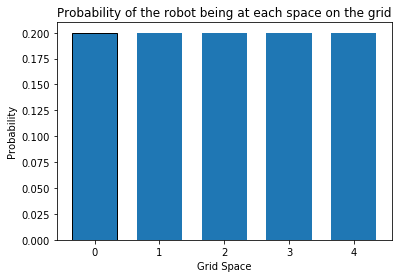

In [8]:
output_map([.2, .2, .2, .2, .2])

### Exercise 4 - Updating Probabilities

Now there's just one more thing to do. As the robot moves around and senses, it will update its belief about where it is on the map. You'll learn about this in the localization lesson that comes up next. In this exercise, you don't need to understand how the robot figures out where it is.

For now, write a function that updates the robot's belief about where it is. The function has these two inputs:

* a list containing the probabilities that the robot is at each spot on the map-grid
* a list of lists. Each element in the list has two entries: the first entry is a point on the map grid, and the second entry is the new probability.

Here is some example input:

The robot is initialized with a five-grid map, so the probabilities are in a list

* robot_grid = [0.2, 0.2, 0.2, 0.2, 0.2]

The robot figures out that it actually has a 0.4 probability of being at the first spot robot_grid[0] and 0.15 probability of being at all the other spots. So the second input looks like this

* [[0, .4], [1, 0.15], [2, 0.15], [3, 0.15], [4, 0.15]]

The output of the function would be the new probabilities:

* [0.4, 0.15, 0.15, 0.15, 0.15]

A for loop might be helpful for solving this exercise.


In [21]:
def update_probabilities(grid, updates):
    
    
    ###
    # TODO: write a for loop that goes through the updates list and updates
    # the probabilities in the grid variable
    ###
    grid_size=len(grid)

    for i in range(0, grid_size):
        for j in range(0,len(updates)):
            if updates[j][0]==i:
                grid[i]=updates[j][1]
    
    print(grid)
    
        ### TODO: update the probabilities inside the grid list
    return 

In [22]:
print(update_probabilities([0.2, 0.2, 0.2, 0.2, 0.2], [[0, .4], [1, 0.15], [2, 0.15], [3, 0.15], [4, 0.15]]))
# output should be [0.4, 0.15, 0.15, 0.15, 0.15]

print(update_probabilities([0.2, 0.2, 0.2, 0.2, 0.2], [[0, .25], [4, 0.15]]))
# output should be [0.25, 0.2, 0.2, 0.2, 0.15]

[0.4, 0.15, 0.15, 0.15, 0.2]
None
[0.25, 0.2, 0.2, 0.2, 0.2]
None
